In [1]:
# Use pip to install the langchain_nvidia_ai_endpoints package
# The -U flag ensures that the package is upgraded to the latest version if it's already installed
!pip install langchain_nvidia_ai_endpoints -U


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the ChatNVIDIA class from the langchain_nvidia_ai_endpoints package
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Import the getpass module to securely handle password inputs
import getpass

# Import the os module to interact with the operating system
import os

# Import the base64 module to encode and decode data in base64 format
import base64


In [3]:
# Check if the environment variable "NVIDIA_API_KEY" is not set
if not os.getenv("NVIDIA_API_KEY"):
    # Prompt the user to enter their NVIDIA API key securely
    # Note: the API key should start with "nvapi-"
    os.environ["NVIDIA_API_KEY"] = getpass.getpass("Enter your NVIDIA API key: ")


In [4]:
# Define the model to be used with the ChatNVIDIA class
model = 'microsoft/phi-3-vision-128k-instruct'

# Create an instance of the ChatNVIDIA class with the specified model
chat = ChatNVIDIA(model=model)

# Specify the path to the image file to be used
img_path = './imgs/demo.png'


In [5]:
# Define the text prompt for generating Python code
text = "Please create Python code for image, and use plt to save the new picture under imgs/ and name it phi-3-vision.jpg."


In [6]:
# Open the image file specified by img_path in binary read mode
with open(img_path, "rb") as f:
    # Read the file and encode its contents to base64
    image_b64 = base64.b64encode(f.read()).decode()

# Create an HTML image tag with the base64-encoded image data
image = f'<img src="data:image/png;base64,{image_b64}" />'

In [7]:
# Combine the text prompt and the HTML image tag into a single string
# The f-string format is used to insert the values of text and image into the prompt
prompt = f"{text} {image}"


In [8]:
# Initialize an empty string to store the generated code
code = ""

# Iterate over the chunks of the response from the chat model
for chunk in chat.stream(prompt):
    # Print each chunk's content without adding a newline at the end
    print(chunk.content, end="")
    # Append each chunk's content to the code string
    code += chunk.content


To create a pie chart from the given data and save it as a JPG image, you can use the following Python code with matplotlib:


```python

import matplotlib.pyplot as plt


# Data to plot

labels = 'physics', 'chemistry', 'english', 'maths'

sizes = [25, 20, 15, 30]

colors = ['red', 'yellow', 'cyan', 'magenta']


# Plot

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Title and style

plt.title('Marks obtained in an exam', pad=20)


# Save the figure

plt.savefig('imgs/phi-3-vision.jpg', format='jpg', bbox_inches='tight')

```


This code will create a pie chart with the given data, set the title, and save the figure as 'imgs/phi-3-vision.jpg'.

In [9]:
# The variable 'code' now contains the complete generated code as a string
code


"To create a pie chart from the given data and save it as a JPG image, you can use the following Python code with matplotlib:\n\n\n```python\n\nimport matplotlib.pyplot as plt\n\n\n# Data to plot\n\nlabels = 'physics', 'chemistry', 'english', 'maths'\n\nsizes = [25, 20, 15, 30]\n\ncolors = ['red', 'yellow', 'cyan', 'magenta']\n\n\n# Plot\n\nfig1, ax1 = plt.subplots()\n\nax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)\n\nax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n\n\n# Title and style\n\nplt.title('Marks obtained in an exam', pad=20)\n\n\n# Save the figure\n\nplt.savefig('imgs/phi-3-vision.jpg', format='jpg', bbox_inches='tight')\n\n```\n\n\nThis code will create a pie chart with the given data, set the title, and save the figure as 'imgs/phi-3-vision.jpg'."

In [10]:
# Find the starting index of the Python code block within the generated code
# The index is set to the position right after '```python'
begin = code.index('```python') + 9

# Slice the code string from the starting index to the end
code = code[begin:]


In [11]:
# Find the ending index of the Python code block within the generated code
# The index is set to the position of the closing '```'
end = code.index('```')


In [12]:
# Slice the code string to include only the content up to the ending index
# This removes the closing '```' from the code block
code = code[:end]


In [13]:
# The variable 'code' now contains the cleaned Python code as a string
code

"\n\nimport matplotlib.pyplot as plt\n\n\n# Data to plot\n\nlabels = 'physics', 'chemistry', 'english', 'maths'\n\nsizes = [25, 20, 15, 30]\n\ncolors = ['red', 'yellow', 'cyan', 'magenta']\n\n\n# Plot\n\nfig1, ax1 = plt.subplots()\n\nax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)\n\nax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n\n\n# Title and style\n\nplt.title('Marks obtained in an exam', pad=20)\n\n\n# Save the figure\n\nplt.savefig('imgs/phi-3-vision.jpg', format='jpg', bbox_inches='tight')\n\n"

In [14]:
# Import the subprocess module to allow for spawning new processes,
# connecting to their input/output/error pipes, and obtaining their return codes
import subprocess


In [15]:
# Run the generated Python code as a subprocess
# The 'python' command is used with the '-c' option to execute the code string
# The 'capture_output' parameter is set to True to capture the standard output and error
result = subprocess.run(["python", "-c", code], capture_output=True)


In [16]:
# Import the Image and display functions from the IPython.display module
# These functions are used to display images in Jupyter notebooks
from IPython.display import Image, display


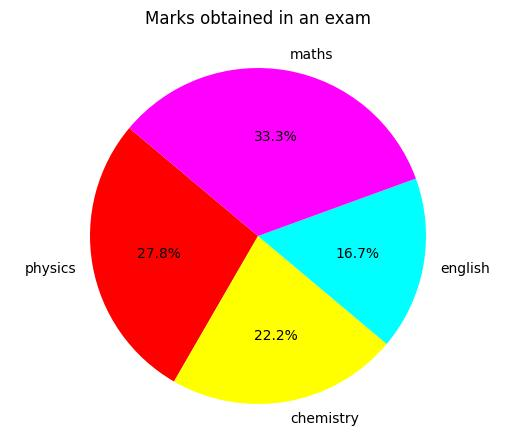

In [17]:
display(Image(filename='./imgs/phi-3-vision.jpg'))

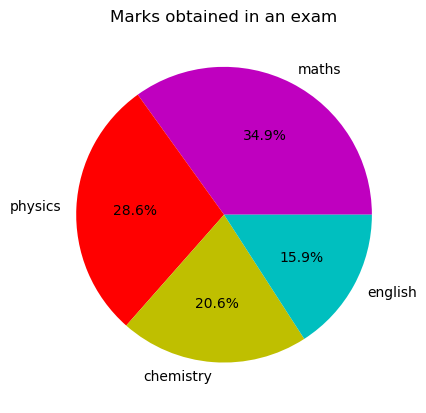

In [18]:
# Display the image located at the specified file path
# The Image function from IPython.display is used to create an image object
# The display function is used to render the image in the output cell
display(Image(filename='./imgs/demo.png'))
